In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [12]:
import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', database="training", port=5432, user='dot_student', password='qgis')
#cursor = conn.cursor()

In [20]:
df = pd.read_sql("select * from noise_311", conn)

In [21]:
df['time'] = df[b'closed_date'] - df[b'created_date']

In [22]:
df.describe()

/Users/paul/.virtualenvs/dataanalysis/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,b'unique_key',b'x_coordinate',b'y_coordinate',b'latitude',b'longitude',time
count,3.761500e+04,3.736300e+04,37363.000000,37363.000000,37363.000000,37615
mean,2.848004e+07,1.002332e+06,212926.874207,40.751076,-73.934715,0 days 07:44:22.532500
std,1.892448e+05,1.727615e+04,29488.008628,0.080940,0.062316,1 days 12:06:09.012799
min,2.815695e+07,9.143810e+05,121683.000000,40.500415,-74.251277,0 days 00:01:00
25%,2.831167e+07,NaN,NaN,NaN,NaN,0 days 00:54:00
50%,2.849327e+07,NaN,NaN,NaN,NaN,0 days 02:02:00
75%,2.865054e+07,NaN,NaN,NaN,NaN,0 days 04:15:00
max,2.879956e+07,1.066985e+06,271639.000000,40.912218,-73.701409,48 days 05:45:00


In [23]:
from datetime import timedelta
from math import nan

no_delta_count = 0

def delta_to_seconds(delta):
    if not isinstance(delta, timedelta):
        global no_delta_count
        no_delta_count = no_delta_count + 1
        return nan
    else:
        return timedelta.total_seconds(delta)

    
df['time_seconds'] = df['time'].apply(delta_to_seconds)

print(no_delta_count, "values out of", len(df), "weren't time deltas.")

0 values out of 37615 weren't time deltas.


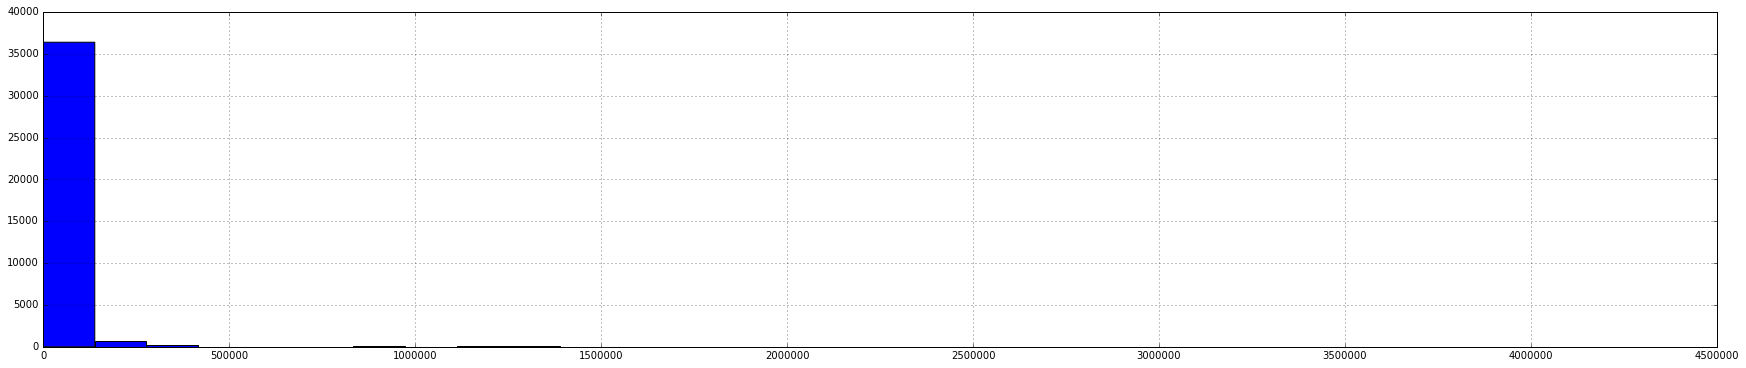

In [25]:
df['time_seconds'].hist(bins=30, figsize=(30, 6))

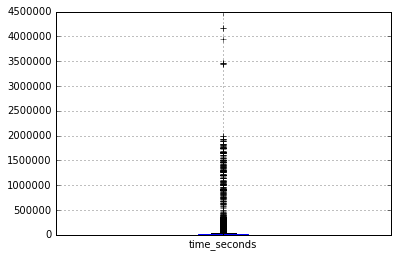

In [26]:
df[['time_seconds']].boxplot(return_type='axes')

In [47]:
# The maximum time
print("The maximum time is", df['time'].max())
df.iloc[df[['time']].idxmax()]

The maximum time is 48 days 05:45:00


,b'unique_key',b'created_date',b'closed_date',b'agency',b'agency_name',b'complaint_type',b'descriptor',b'location_type',b'incident_zip',b'incident_address',...,b'road_ramp',b'bridge_highway_segment',b'garage_lot_name',b'ferry_direction',b'ferry_terminal_name',b'latitude',b'longitude',b'location',time,time_seconds
3797,28742581,2014-08-23 09:42:00,2014-10-10 15:27:00,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,11209,19 MARINE AVENUE,...,None,None,None,None,None,40.619919,-74.037664,"(40.61991948587691, -74.03766382225142)",48 days 05:45:00,4167900.0


In [48]:
# Minimum time
print("The minimum time is", df['time'].min())

df.iloc[df[['time_seconds']].idxmin()]

The minimum time is 0 days 00:01:00


,b'unique_key',b'created_date',b'closed_date',b'agency',b'agency_name',b'complaint_type',b'descriptor',b'location_type',b'incident_zip',b'incident_address',...,b'road_ramp',b'bridge_highway_segment',b'garage_lot_name',b'ferry_direction',b'ferry_terminal_name',b'latitude',b'longitude',b'location',time,time_seconds
11089,28625381,2014-08-05 08:59:00,2014-08-05 09:00:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",None,11211,145 DEVOE STREET,...,None,None,None,None,None,40.713745,-73.944868,"(40.71374540889199, -73.94486761672988)",00:01:00,60.0


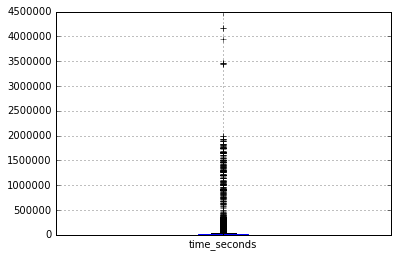

In [54]:
df.boxplot(column='time_seconds', return_type='axes')
df['time_seconds'].hist()

# After this comment: assignment 4

In [19]:
def set_timeframe(time_seconds):
    if time_seconds < 0:
        return 'Negative'
    elif time_seconds == 0:
        return 'Zero'
    elif time_seconds < 604800:
        return 'Less than a week'
    elif time_seconds >= 604800:
        return 'More than a week'
    else:
        return 'Undefined'
    
df['timeframe'] = df['time_seconds'].apply(set_timeframe)

In [20]:
df['timeframe'].value_counts()

Less than a week    3499
More than a week    1048
Negative             582
Zero                 521
Undefined            201
Name: timeframe, dtype: int64

In [21]:
print("Top complaints per timeframe:")
df.groupby('timeframe')['complaint'].value_counts()

Top complaints per timeframe:


timeframe         complaint                 
Less than a week  Street Condition              1640
                  Traffic Signal Condition       762
                  Street Light Condition         739
                  Sidewalk Condition              86
                  Highway Condition               67
                  Street Sign - Damaged           42
                  Street Sign - Missing           33
                  DOT Literature Request          31
                  Street Sign - Dangling          30
                  Curb Condition                  17
                  Bridge Condition                14
                  Ferry Inquiry                   13
                  Broken Muni Meter               12
                  Bus Stop Shelter Placement       6
                  Ferry Complaint                  4
                  Public Toilet                    2
                  Highway Sign - Damaged           1
More than a week  Broken Muni Meter              513
 

timeframe
Less than a week    [[Axes(0.125,0.125;0.775x0.775)]]
More than a week    [[Axes(0.125,0.125;0.775x0.775)]]
Negative            [[Axes(0.125,0.125;0.775x0.775)]]
Undefined           [[Axes(0.125,0.125;0.775x0.775)]]
Zero                [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

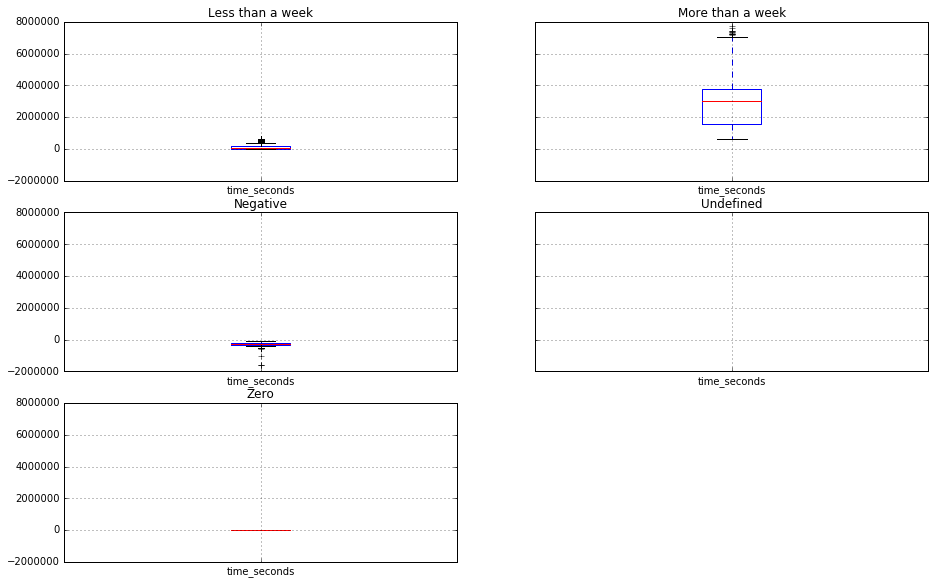

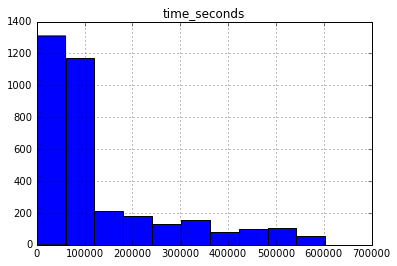

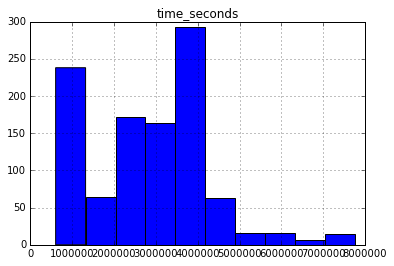

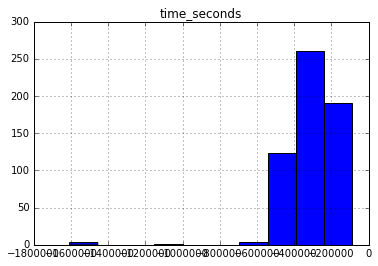

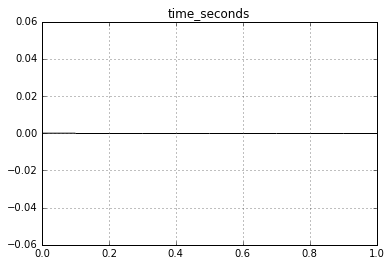

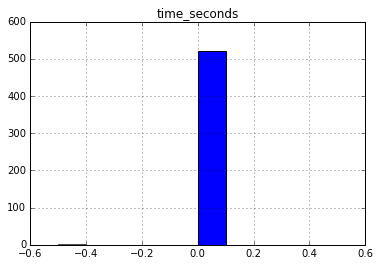

In [23]:
# Let's have a closer look at these four groups

df.groupby('timeframe').boxplot(figsize=(15, 10), return_type='axes')
df.groupby('timeframe').hist()

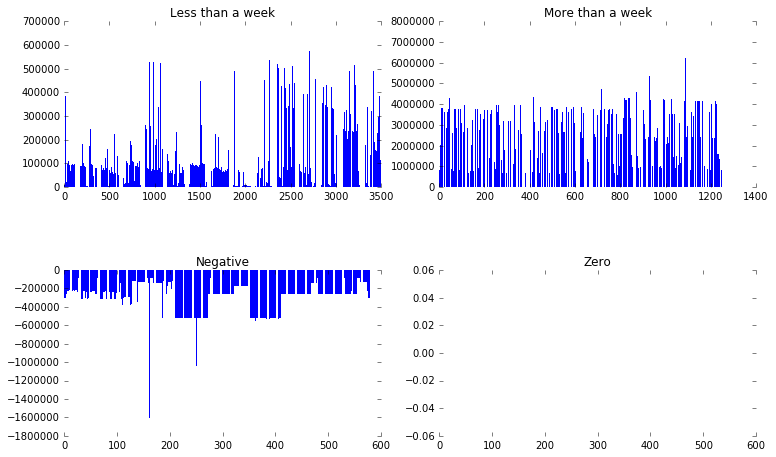

In [22]:
# Fun with small multiples!

category = 'timeframe'
categories = df[category].unique().tolist()

nrows = 2; ncols = 2
num_plots = nrows * ncols  # number of subplots

fig = plt.figure(figsize=(10, 6))

axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

plt.tight_layout(pad=0, w_pad=3, h_pad=1)
plt.subplots_adjust(hspace=.5)


for i in range(num_plots):
    ax = axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    dfx = df[df[category]==categories[i]]#.head(5)
    
#   BAR CHARTS
    x = dfx['complaint']
    y = dfx['time_seconds']
    ax.set_title(categories[i])
    ax.bar(left=range(0, len(dfx)), height=dfx['time_seconds'], linewidth=0)    
